In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dmv7

In [2]:
d7= pd.read_csv(r"C:\Users\Gaju\Desktop\Aditee\New\BE AIDS DATASETS\Data Modelling and Visualization\Assignment 7\sample_7.csv")
d7.head()

,ID,Salesman,Sales,P Type,Channel,Address
0,101,Ram,12000.0,Grocery,Offline,Pune
1,253,Sham,10000.0,Food,Online,Nagpur
2,555,Tony,30000.0,Clothing,Online,Chennai
3,789,Jack,44000.0,Medicines,Online,Banglore
4,544,Luke,NaN,Waste,Offline,Delhi


In [3]:
# 1st two row
d71 = d7[0:2]

# next two rows
d72 = d7[3:5]

# last 3 rows
d73 = d7[5:]

In [4]:
d71

,ID,Salesman,Sales,P Type,Channel,Address
0,101,Ram,12000.0,Grocery,Offline,Pune
1,253,Sham,10000.0,Food,Online,Nagpur


In [5]:
d72

,ID,Salesman,Sales,P Type,Channel,Address
3,789,Jack,44000.0,Medicines,Online,Banglore
4,544,Luke,NaN,Waste,Offline,Delhi


In [6]:
d73

,ID,Salesman,Sales,P Type,Channel,Address
5,123,Gopal,123456.0,Electronics,NaN,Mumbai
6,365,Karan,9999.0,Breverages,NaN,Jammu
7,963,Tina,5000.0,Stationary,Online,Bhopal


In [7]:
# convert d71 to json
d71_json = d71.to_json(orient='records')

with open('d71_json.json', 'w') as file:
    file.write(d71_json)

# convert d72 to excel
d72_excel = d72.to_excel('d72_excel.xlsx',index=False)

# let d73 be as it is. Now you got 3 different formats of file

In [8]:
d711 = pd.read_json('d71_json.json')
d722 = pd.read_excel('d72_excel.xlsx')
d733 = d73

In [9]:
frames = [d711, d722, d733]

d7f = pd.concat(frames)

In [10]:
# missing values?
d7f.isna().sum()

ID          0
Salesman    0
Sales       1
P Type      0
Channel     2
Address     0
dtype: int64

In [11]:
# drop null or fill artificial values
d7f.fillna(method='ffill', inplace=True)

In [12]:
d7f

,ID,Salesman,Sales,P Type,Channel,Address
0,101,Ram,12000.0,Grocery,Offline,Pune
1,253,Sham,10000.0,Food,Online,Nagpur
0,789,Jack,44000.0,Medicines,Online,Banglore
1,544,Luke,44000.0,Waste,Offline,Delhi
5,123,Gopal,123456.0,Electronics,Offline,Mumbai
6,365,Karan,9999.0,Breverages,Offline,Jammu
7,963,Tina,5000.0,Stationary,Online,Bhopal


In [13]:
# 6. Analyze the sales data by performing descriptive statistics, aggregating data by
# specific variables, or calculating metrics such as total sales, average order value, or
# product category distribution.
d7f.describe()

,ID,Sales
count,7.000000,7.000000
mean,448.285714,35493.571429
std,332.081674,42158.053101
min,101.000000,5000.000000
25%,188.000000,9999.500000
50%,365.000000,12000.000000
75%,666.500000,44000.000000
max,963.000000,123456.000000


In [14]:
d7f.groupby('Channel').agg({'Sales': pd.Series.sum})

,Sales
Channel,
Offline,189455.0
Online,59000.0


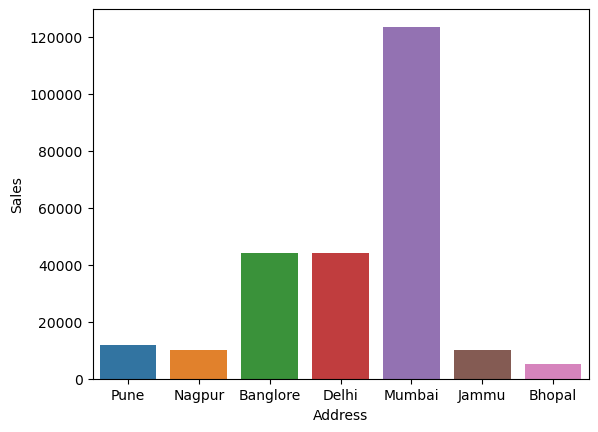

In [15]:
# Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales
# data and gain insights into sales trends, customer behavior, or product performance.

sns.barplot(x=d7f['Address'], y=d7f['Sales'])
plt.show()

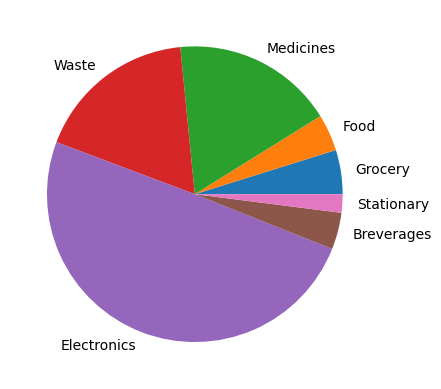

In [16]:
plt.pie(x=d7f['Sales'], labels=d7f['P Type'])
plt.show()

# dmv 9

In [176]:
d9 = pd.read_csv('Assignment 9/tele_com.csv')

In [177]:
d9.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber opticalal,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [178]:
d9.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       3
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [179]:
d9.shape

(14, 21)

In [180]:
d9.dropna(inplace=True)

In [181]:
d9.duplicated().sum()

0

In [182]:
d9.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [183]:
up = np.quantile(d9['TotalCharges'], 0.75)
dn = np.quantile(d9['TotalCharges'], 0.25)

d91 = d9[ (d9['TotalCharges'] < dn) | (d9['TotalCharges'] > up) ]
d91

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber opticalal,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber opticalal,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber opticalal,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [184]:
# outliers index
ol_ind = d91.index

In [185]:
# droped outliers indexes
d9.drop(ol_ind, inplace=True)

In [186]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [187]:
s = StandardScaler()
le = LabelEncoder()

In [188]:
d9.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber opticalal,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber opticalal,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber opticalal,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No


In [189]:
d9.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [190]:
d9[[ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']] = d9[[ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].apply(le.fit_transform)

In [191]:
d9.drop('customerID', inplace=True, axis=1)

In [211]:
d9

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,0,0,0,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
5,0,0,0,0,8,0,1,1,0,0,1,0,1,1,0,1,1,99.65,820.50,1
6,1,0,0,1,22,0,1,1,0,1,0,0,1,0,0,1,0,89.10,1949.40,0
8,0,0,1,0,28,0,1,1,0,0,1,1,1,1,0,1,1,104.80,3046.05,1
10,1,0,1,1,13,0,0,0,1,0,0,0,0,0,0,1,2,49.95,587.45,0


In [215]:
d9_train = d9[0:3]
d9_test = d9[3:]

In [216]:
d9_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,0,0,0,1,0,1,0,0,0,1,0,2,56.95,1889.5,0
5,0,0,0,0,8,0,1,1,0,0,1,0,1,1,0,1,1,99.65,820.5,1
6,1,0,0,1,22,0,1,1,0,1,0,0,1,0,0,1,0,89.10,1949.4,0


In [217]:
d9_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,0,0,1,0,28,0,1,1,0,0,1,1,1,1,0,1,1,104.80,3046.05,1
10,1,0,1,1,13,0,0,0,1,0,0,0,0,0,0,1,2,49.95,587.45,0


# dmv13

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [32]:
d = pd.read_csv(r"C:\Users\Gaju\Desktop\Aditee\New\BE AIDS DATASETS\Data Modelling and Visualization\Assignment 13\Stock_Prices.csv")

In [33]:
d = d.dropna()  # Remove rows with missing values


In [34]:
d = d[d.Name == 'AAL']

In [35]:
d.Date = pd.to_datetime(d.Date, dayfirst=True)

In [36]:
d.duplicated().sum()

0

In [37]:
d.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [38]:
d = d.sort_values('Date', ascending=True)

In [39]:
d[d.Date == '04-05-2017']

,Date,Open,High,Low,Close,Volume,Name
1046,2017-04-05,41.15,42.13,41.06,41.31,7012673,AAL


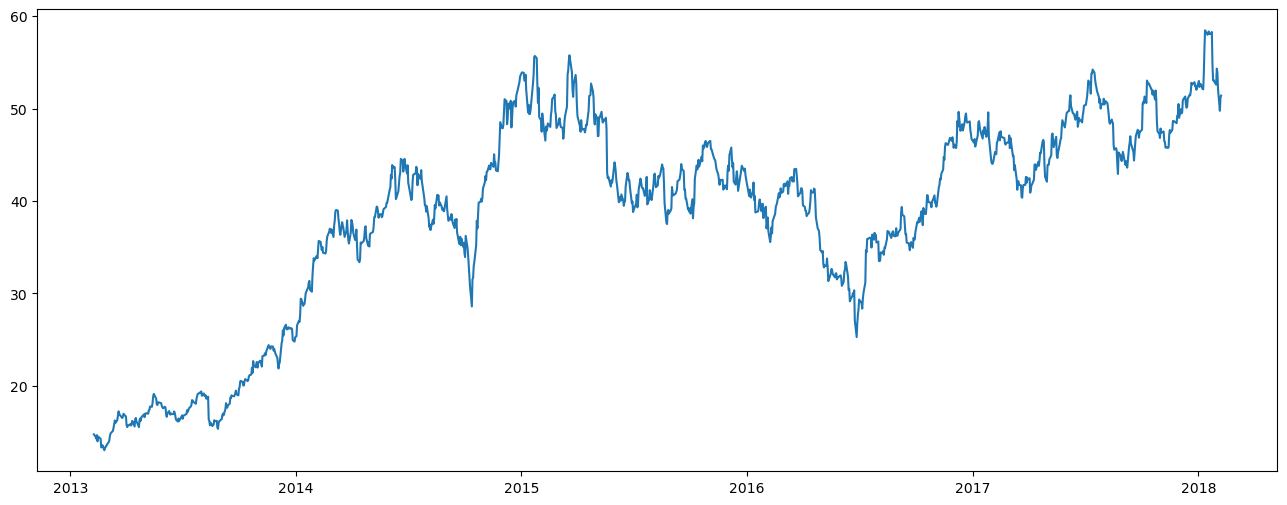

In [40]:
plt.figure(figsize=(16, 6), dpi=100)
plt.plot(d.Date, d.Close)
plt.show()

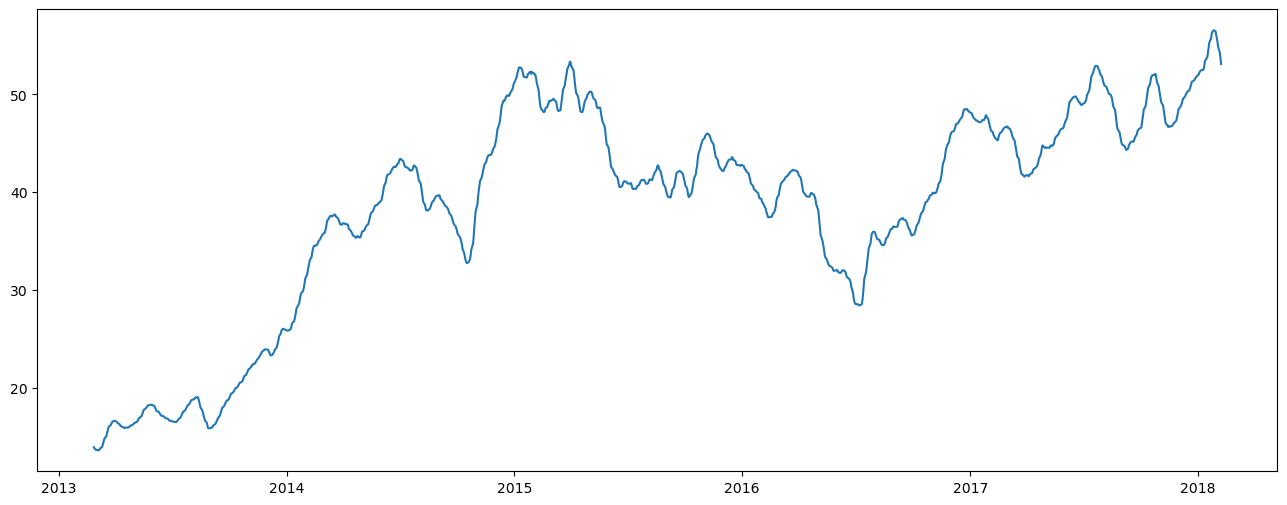

In [41]:
window12mean = d.Close.rolling(window=12).mean()

plt.figure(figsize=(16, 6))
plt.plot(d.Date, window12mean)
plt.show()

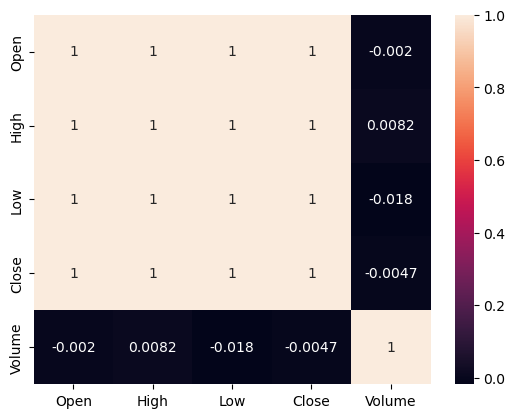

In [44]:
numeric_data = d.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

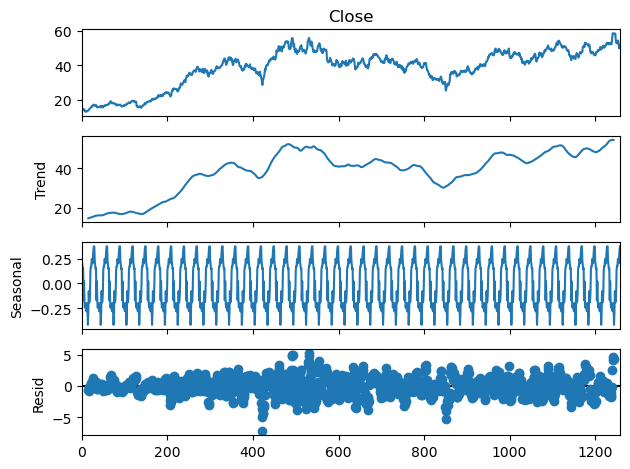

In [48]:
result = seasonal_decompose(d['Close'], model='additive', period=30)
result.plot()
plt.show()

In [51]:
train_data, test_data = train_test_split(d, test_size=0.2, shuffle=False)

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(train_data['Close'], seasonal='add', seasonal_periods=12)
results_es = model_es.fit()
forecast_es = results_es.forecast(steps=len(test_data))

In [53]:
from sklearn.metrics import mean_squared_error

rmse_es = np.sqrt(mean_squared_error(test_data['Close'], forecast_es))
print("RMSE for Exponential Smoothing Model:", rmse_es)

RMSE for Exponential Smoothing Model: 4.949933742771487


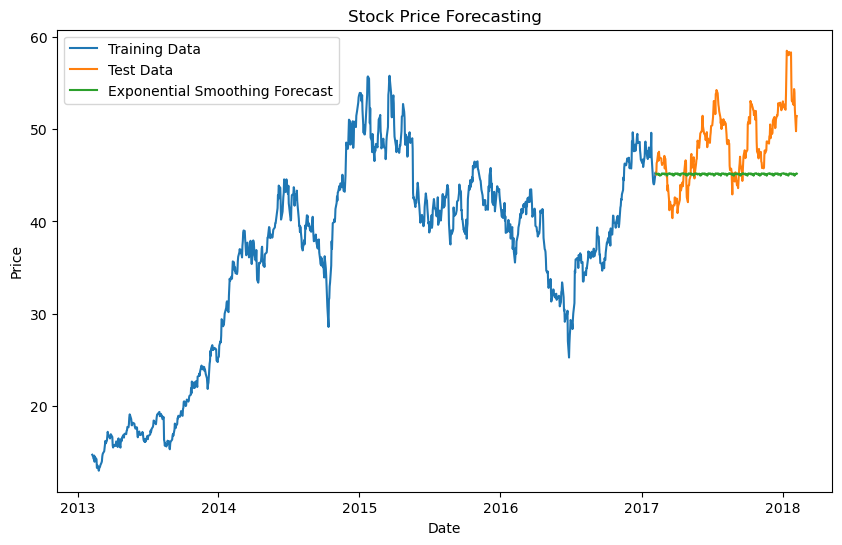

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Close'], label="Training Data")
plt.plot(test_data['Date'], test_data['Close'], label="Test Data")
plt.plot(test_data['Date'], forecast_es, label="Exponential Smoothing Forecast")
plt.title("Stock Price Forecasting")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()